# 01 — Demographics EDA

**Goal:** Understand the shape and quality of our synthetic patient demographics:
- Validate columns and types
- Basic stats (count, age min/mean/median/max)
- Distributions (age, gender, blood group)
- Save clean visuals for README/app

In [ ]:
pip install numpy
pip install pandas

In [11]:
from pathlib import Path
import numpy as np 
import pandas as pd 

ROOT = Path(__file__).resolve().parents[1] if "__file__" in globals() else Path.cwd().parents[0]
DATA_RAW = ROOT / "data" / "raw"
ASSETS = ROOT / "app" / "assets" / "eda"
ASSETS.mkdir(parents = True, exist_ok=True)

print("ROOT", ROOT)
print("DATA_RAW", DATA_RAW)
print("ASSETS", ASSETS)

ROOT c:\Users\hines\medical-report-assistance
DATA_RAW c:\Users\hines\medical-report-assistance\data\raw
ASSETS c:\Users\hines\medical-report-assistance\app\assets\eda


In [14]:
csv_path = DATA_RAW / "patient_demographic.csv"
assert csv_path.exists(), f"Missing file: {csv_path}. Run the generator first"

df = pd.read_csv(csv_path)
df.head()

,patient_id,name,age,gender,blood_group,contact_number,address
0,1,Victoria Harris,47,Other,A-,(438)984-6096x72646,"099 Holt Trail\nStevensfurt, VI 36347"
1,2,William Holmes,63,Female,B+,(666)631-0901,"14519 Jackson Pine\nMillerview, MN 04231"
2,3,Adrian Bradley,13,Male,AB+,415-752-7477x6397,"95287 Annette Meadow\nTommychester, CT 67975"
3,4,Anna Brown,6,Male,A-,306.482.0875x78988,"485 Shannon Rapid Apt. 735\nPort David, MI 66851"
4,5,Charlene Ortiz,31,Female,A+,(480)696-9250,"5910 Julia Ridges Apt. 983\nMargaretview, GU 3..."


In [16]:
print("Shape: ", df.shape)

display(df.dtypes)

Shape:  (200, 7)


patient_id         int64
name              object
age                int64
gender            object
blood_group       object
contact_number    object
address           object
dtype: object

In [22]:
nulls = df.isnull().sum().sort_values(ascending=False)
display(nulls)

patient_id        0
name              0
age               0
gender            0
blood_group       0
contact_number    0
address           0
dtype: int64

In [30]:
age_stats = df['age'].describe().to_frame('age')

gender_counts = df.gender.value_counts(dropna=False)

blood_counts = df.blood_group.value_counts(dropna=False)

display(age_stats)
display(gender_counts)
display(blood_counts)

,age
count,200.00000
mean,47.49000
std,25.54452
min,1.00000
25%,25.75000
50%,50.50000
75%,69.00000
max,90.00000


gender
Female    71
Male      65
Other     64
Name: count, dtype: int64

blood_group
A+     30
O+     30
A-     29
AB+    27
B-     27
B+     22
O-     19
Ab-    16
Name: count, dtype: int64

In [32]:
pip install matplotlib 

  Using cached matplotlib-3.10.6-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp312-cp312-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.59.2-cp312-cp312-win_amd64.whl.metadata (111 kB)
  Using cached kiwisolver-1.4.9-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.3.0-cp312-cp312-win_amd64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.6-cp312-cp312-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp312-cp312-win_amd64.whl (226 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.59.2-cp312-cp312-win_amd64.whl (2.3 MB)
Using cached kiwisolver-1.4.9-cp312-cp312-win_amd64.whl (73 kB)
Using cached pillow-11.3.0-cp312-cp312-win_amd64.whl (7.0 MB)
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)

   ---------------------------------------- 0/7 [pyparsing]
   -

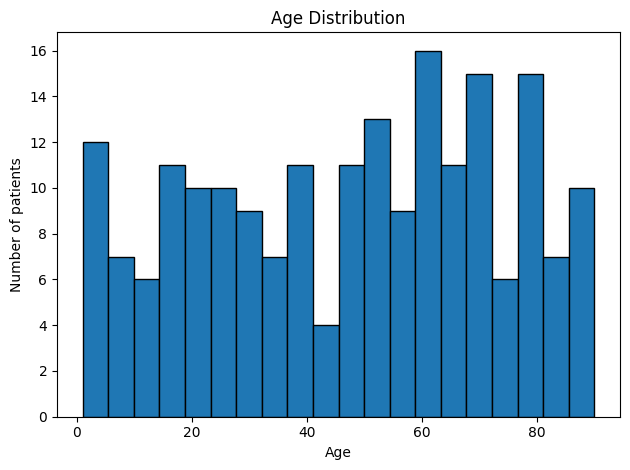

In [37]:
import matplotlib.pyplot as plt
#Age histogram
plt.figure()
plt.hist(df.age, bins=20, edgecolor = "black")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of patients")
plt.tight_layout()
plt.savefig(ASSETS / "age_distribution.png", dpi=150) #fpi=dot per inch
plt.show()

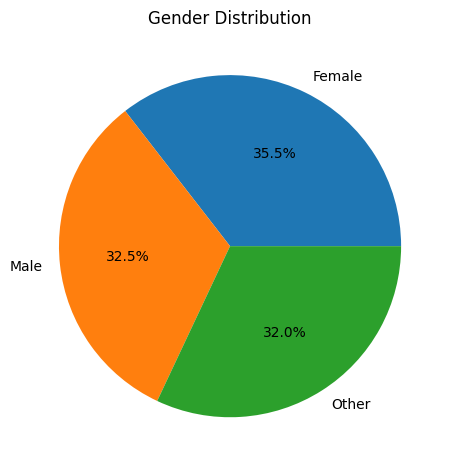

In [ ]:
plt.figure()
df.gender.value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.title("Gender Distribution")
plt.ylabel("")
plt.tight_layout()
plt.savefig(ASSETS / "gender_distribution.png", dpi=150)
plt.show()

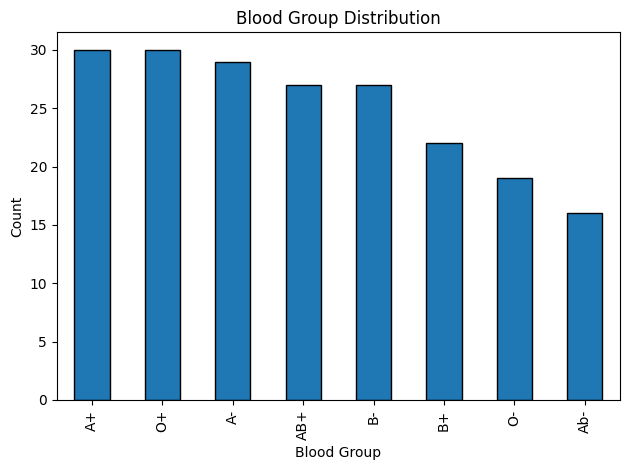

In [43]:
plt.figure()
df.blood_group.value_counts().plot(kind="bar",edgecolor="black")
plt.title("Blood Group Distribution")
plt.xlabel("Blood Group")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(ASSETS / "blood_group_distribution.png", dpi=150)
plt.show()

In [ ]:
#Key takeaways:

# 1) Dataset Size: 200 x 7

# 2) Age Distribution: Distribution looks fairly uniform — not strongly skewed

# 3) Gender split: The dataset is fairly balanced

# 4) Distribution looks slightly skewed toward A+, O+, and A−, while AB− is the rarest.

